<a href="https://colab.research.google.com/github/moyothandiwe/moondancer/blob/main/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

## Import the dataset

In [ ]:
# import data from google drive

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read the dataset from google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
training = pd.read_excel("/content/drive/My Drive/Machine Learning Project/training_dataset.xlsx")

# Show top 5-records
training.head()


Mounted at /content/drive


,URBRRL,RATCAT_A,INCGRP_A,INCTCFLG_A,FAMINCTC_A,IMPINCFLG_A,RJWKCLSOFT_A,RJWCLSNOSD_A,RJWRKCLSSD_A,RECJOBSD_A,...,PHSTAT_A,PROXYREL_A,PROXY_A,AVAIL_A,HHSTAT_A,INTV_MON,RECTYPE,WTFA_A,HHX,POVRATTC_A
0,2,11,3,0,70000,0,NaN,NaN,NaN,NaN,...,3,NaN,NaN,1,1,3,10,13772.434,H050728,3.50
1,4,6,1,0,30000,0,NaN,NaN,NaN,NaN,...,1,NaN,NaN,1,1,7,10,9326.686,H053010,1.70
2,3,11,3,0,63464,0,NaN,NaN,NaN,NaN,...,1,NaN,NaN,1,1,2,10,4509.724,H067137,3.60
3,3,5,1,0,25000,2,NaN,NaN,NaN,NaN,...,3,NaN,NaN,1,1,11,10,10849.226,H040530,1.46
4,4,13,4,0,75000,0,NaN,NaN,NaN,NaN,...,4,NaN,NaN,1,1,7,10,5771.964,H052303,4.85


## Data Cleaning


In [ ]:
# Identify columns with non-numerical data or strings
training.select_dtypes(exclude=['number']).columns


Index(['HHX'], dtype='object')

In [ ]:
# Assuming your DataFrame is named 'data'
nan_columns = training.columns[training.isnull().all()]

# Print the columns with only NaN values
print(nan_columns)

Index(['OGFLG_A', 'CHFLG_A', 'PRPLCOV2_C_A'], dtype='object')


In [ ]:
training_dataset= training.drop(columns=['HHX']) #remove HHX as it is identifier
training_dataset=training_dataset.dropna(axis=1, how='all') #drop columns where all values are NaN
training_dataset.head()

,URBRRL,RATCAT_A,INCGRP_A,INCTCFLG_A,FAMINCTC_A,IMPINCFLG_A,RJWKCLSOFT_A,RJWCLSNOSD_A,RJWRKCLSSD_A,RECJOBSD_A,...,HYPEV_A,PHSTAT_A,PROXYREL_A,PROXY_A,AVAIL_A,HHSTAT_A,INTV_MON,RECTYPE,WTFA_A,POVRATTC_A
0,2,11,3,0,70000,0,NaN,NaN,NaN,NaN,...,2,3,NaN,NaN,1,1,3,10,13772.434,3.50
1,4,6,1,0,30000,0,NaN,NaN,NaN,NaN,...,2,1,NaN,NaN,1,1,7,10,9326.686,1.70
2,3,11,3,0,63464,0,NaN,NaN,NaN,NaN,...,2,1,NaN,NaN,1,1,2,10,4509.724,3.60
3,3,5,1,0,25000,2,NaN,NaN,NaN,NaN,...,1,3,NaN,NaN,1,1,11,10,10849.226,1.46
4,4,13,4,0,75000,0,NaN,NaN,NaN,NaN,...,1,4,NaN,NaN,1,1,7,10,5771.964,4.85


In [ ]:
data=training_dataset

In [ ]:
#for loop to replace all NaN values
for column in data.columns:
  if data[column].notna().any():  # Check if column has any non-NaN values
  # Calculate the mean of the column (excluding NaN values)
    if pd.api.types.is_numeric_dtype(data[column]):
      median = data[column].median() #less sensitive to outliers
      data[column] = data[column].fillna(median)

data.head()

<ipython-input-7-3e8c563d655c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].fillna(median)


,URBRRL,RATCAT_A,INCGRP_A,INCTCFLG_A,FAMINCTC_A,IMPINCFLG_A,RJWKCLSOFT_A,RJWCLSNOSD_A,RJWRKCLSSD_A,RECJOBSD_A,...,HYPEV_A,PHSTAT_A,PROXYREL_A,PROXY_A,AVAIL_A,HHSTAT_A,INTV_MON,RECTYPE,WTFA_A,POVRATTC_A
0,2,11,3,0,70000,0,2.0,3.0,3.0,2.0,...,2,3,1.0,1.0,1,1,3,10,13772.434,3.50
1,4,6,1,0,30000,0,2.0,3.0,3.0,2.0,...,2,1,1.0,1.0,1,1,7,10,9326.686,1.70
2,3,11,3,0,63464,0,2.0,3.0,3.0,2.0,...,2,1,1.0,1.0,1,1,2,10,4509.724,3.60
3,3,5,1,0,25000,2,2.0,3.0,3.0,2.0,...,1,3,1.0,1.0,1,1,11,10,10849.226,1.46
4,4,13,4,0,75000,0,2.0,3.0,3.0,2.0,...,1,4,1.0,1.0,1,1,7,10,5771.964,4.85


In [ ]:
# split dataset in two parts: feature set and target label
features=data.drop('WEIGHTLBTC_A', axis=1)
target=data['WEIGHTLBTC_A']



In [ ]:
features.describe()

,URBRRL,RATCAT_A,INCGRP_A,INCTCFLG_A,FAMINCTC_A,IMPINCFLG_A,RJWKCLSOFT_A,RJWCLSNOSD_A,RJWRKCLSSD_A,RECJOBSD_A,...,HYPEV_A,PHSTAT_A,PROXYREL_A,PROXY_A,AVAIL_A,HHSTAT_A,INTV_MON,RECTYPE,WTFA_A,POVRATTC_A
count,20340.000000,20340.000000,20340.000000,20340.000000,20340.000000,20340.000000,20340.000000,20340.000000,20340.000000,20340.000000,...,20340.000000,20340.000000,20340.000000,20340.000000,20340.000000,20340.0,20340.000000,20340.0,20340.000000,20340.000000
mean,2.317650,10.131858,3.119371,0.036185,81494.078417,0.363668,2.011013,2.991445,2.997591,1.987168,...,1.650934,2.339676,1.003097,1.000197,1.143363,1.0,6.820108,10.0,7865.011012,4.403138
std,1.054041,3.895839,1.579656,0.186754,63031.416044,0.710902,0.258732,0.196147,0.153764,0.210783,...,0.533809,1.047854,0.072465,0.014022,0.919118,0.0,3.534833,0.0,6536.120255,2.998080
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,10.0,396.210000,0.000000
25%,1.000000,8.000000,1.000000,0.000000,34000.000000,0.000000,2.000000,3.000000,3.000000,2.000000,...,1.000000,2.000000,1.000000,1.000000,1.000000,1.0,3.000000,10.0,3666.176500,2.030000
50%,2.000000,11.000000,3.000000,0.000000,65000.000000,0.000000,2.000000,3.000000,3.000000,2.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,1.0,8.000000,10.0,6226.949500,3.750000
75%,3.000000,14.000000,5.000000,0.000000,110000.000000,0.000000,2.000000,3.000000,3.000000,2.000000,...,2.000000,3.000000,1.000000,1.000000,1.000000,1.0,10.000000,10.0,9777.649500,6.060000
max,4.000000,14.000000,5.000000,1.000000,250000.000000,2.000000,9.000000,9.000000,4.000000,9.000000,...,9.000000,9.000000,4.000000,2.000000,8.000000,1.0,12.000000,10.0,91832.051000,11.000000


In [ ]:
#Standardise Data using Robust Scaler - Less sensitive to outliers as it uses to Median
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
features_scaled = scaler.fit_transform(features)
features_scaled = pd.DataFrame(features_scaled, columns=features.columns)

Xs = features_scaled
ys = target
Xs.describe()

,URBRRL,RATCAT_A,INCGRP_A,INCTCFLG_A,FAMINCTC_A,IMPINCFLG_A,RJWKCLSOFT_A,RJWCLSNOSD_A,RJWRKCLSSD_A,RECJOBSD_A,...,HYPEV_A,PHSTAT_A,PROXYREL_A,PROXY_A,AVAIL_A,HHSTAT_A,INTV_MON,RECTYPE,WTFA_A,POVRATTC_A
count,20340.000000,20340.000000,20340.000000,20340.000000,20340.000000,20340.000000,20340.000000,20340.000000,20340.000000,20340.000000,...,20340.000000,20340.000000,20340.000000,20340.000000,20340.000000,20340.0,20340.000000,20340.0,20340.000000,20340.000000
mean,0.158825,-0.144690,0.029843,0.036185,0.217027,0.363668,0.011013,-0.008555,-0.002409,-0.012832,...,-0.349066,0.339676,0.003097,0.000197,0.143363,0.0,-0.168556,0.0,0.268031,0.162069
std,0.527020,0.649306,0.394914,0.186754,0.829361,0.710902,0.258732,0.196147,0.153764,0.210783,...,0.533809,1.047854,0.072465,0.014022,0.919118,0.0,0.504976,0.0,1.069484,0.743940
min,-0.500000,-1.666667,-0.500000,0.000000,-0.855263,0.000000,-1.000000,-2.000000,-2.000000,-1.000000,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.0,-1.000000,0.0,-0.954065,-0.930521
25%,-0.500000,-0.500000,-0.500000,0.000000,-0.407895,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,0.0,-0.714286,0.0,-0.419011,-0.426799
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
75%,0.500000,0.500000,0.500000,0.000000,0.592105,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.285714,0.0,0.580989,0.573201
max,1.000000,0.500000,0.500000,1.000000,2.434211,2.000000,7.000000,6.000000,1.000000,7.000000,...,7.000000,7.000000,3.000000,1.000000,7.000000,0.0,0.571429,0.0,14.007278,1.799007


In [ ]:
# partition ALL data into training and testing set
from sklearn.model_selection import train_test_split
Xs_train, Xs_test, ys_train, ys_test = \
train_test_split(Xs, ys, test_size=0.3, random_state=42)

## Feature Importance

In [ ]:
# Tree Based Feature Importance using Random Forest
from sklearn.ensemble import RandomForestRegressor


# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model to your data
rf_model.fit(Xs_train, ys_train)

# Get feature importances
feature_importances = rf_model.feature_importances_


# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': Xs.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print or display the DataFrame
importance_df.head(20)




,Feature,Importance
90,BMICAT_A,0.602150
91,HEIGHTTC_A,0.249135
232,SEX_A,0.003974
610,WTFA_A,0.003785
233,AGEP_A,0.003742
39,PPSU,0.002793
40,PSTRAT,0.002744
603,PHSTAT_A,0.002415
611,POVRATTC_A,0.002337
4,FAMINCTC_A,0.002064


In [ ]:
# Calculate cumulative importance
importance_df['Cumulative_Importance'] = importance_df['Importance'].cumsum()

# Filter features based on cumulative importance threshold (88%)
selected_features_rf = importance_df[importance_df['Cumulative_Importance'] <= 0.88]

selected_features_rf.head(20)

,Feature,Importance,Cumulative_Importance
90,BMICAT_A,0.602150,0.602150
91,HEIGHTTC_A,0.249135,0.851285
232,SEX_A,0.003974,0.855258
610,WTFA_A,0.003785,0.859043
233,AGEP_A,0.003742,0.862785
39,PPSU,0.002793,0.865579
40,PSTRAT,0.002744,0.868323
603,PHSTAT_A,0.002415,0.870737
611,POVRATTC_A,0.002337,0.873074
4,FAMINCTC_A,0.002064,0.875138


In [ ]:
features_rf=Xs[selected_features_rf['Feature']]

In [ ]:
features_rf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20340 entries, 0 to 20339
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BMICAT_A      20340 non-null  float64
 1   HEIGHTTC_A    20340 non-null  float64
 2   SEX_A         20340 non-null  float64
 3   WTFA_A        20340 non-null  float64
 4   AGEP_A        20340 non-null  float64
 5   PPSU          20340 non-null  float64
 6   PSTRAT        20340 non-null  float64
 7   PHSTAT_A      20340 non-null  float64
 8   POVRATTC_A    20340 non-null  float64
 9   FAMINCTC_A    20340 non-null  float64
 10  HICOSTR1_A    20340 non-null  float64
 11  INTV_MON      20340 non-null  float64
 12  SPOUSAGETC_A  20340 non-null  float64
dtypes: float64(13)
memory usage: 2.0 MB


In [ ]:
list(features_rf.columns)

In [ ]:
from xgboost import XGBRegressor
import pandas as pd

# XGBoost Model
model_xgb = XGBRegressor(random_state=42)
model_xgb.fit(Xs_train, ys_train)

#Feature Importance
importance = model_xgb.feature_importances_

# Create DataFrame for Visualization
feature_importance_xgb = pd.DataFrame({'Feature': Xs.columns, 'Importance': importance})
feature_importance_xgb = feature_importance_xgb.sort_values(by='Importance', ascending=False)

# Visualize
feature_importance_xgb.head(20) # Display top 20 features


,Feature,Importance
90,BMICAT_A,0.176529
232,SEX_A,0.172175
91,HEIGHTTC_A,0.072049
23,CANCOVOTH_A,0.006987
268,NATUSBORN_A,0.006353
51,CITZNSTP_A,0.005200
247,FDSLAST_A,0.005127
288,ADVWGTPRG_A,0.005044
559,EQUIP_A,0.004558
383,PAITALKTPY_A,0.004524


In [ ]:
# Calculate cumulative importance
feature_importance_xgb['Cumulative_Importance'] = feature_importance_xgb['Importance'].cumsum()

# Filter features based on cumulative importance threshold (95%)
selected_features_xgb = feature_importance_xgb[feature_importance_xgb['Cumulative_Importance'] <= 0.55]

selected_features_xgb.head(200)

,Feature,Importance,Cumulative_Importance
90,BMICAT_A,0.176529,0.176529
232,SEX_A,0.172175,0.348704
91,HEIGHTTC_A,0.072049,0.420754
23,CANCOVOTH_A,0.006987,0.427741
268,NATUSBORN_A,0.006353,0.434094
51,CITZNSTP_A,0.005200,0.439294
247,FDSLAST_A,0.005127,0.444421
288,ADVWGTPRG_A,0.005044,0.449465
559,EQUIP_A,0.004558,0.454023
383,PAITALKTPY_A,0.004524,0.458547


In [ ]:
features_xgb=Xs[selected_features_xgb['Feature']]


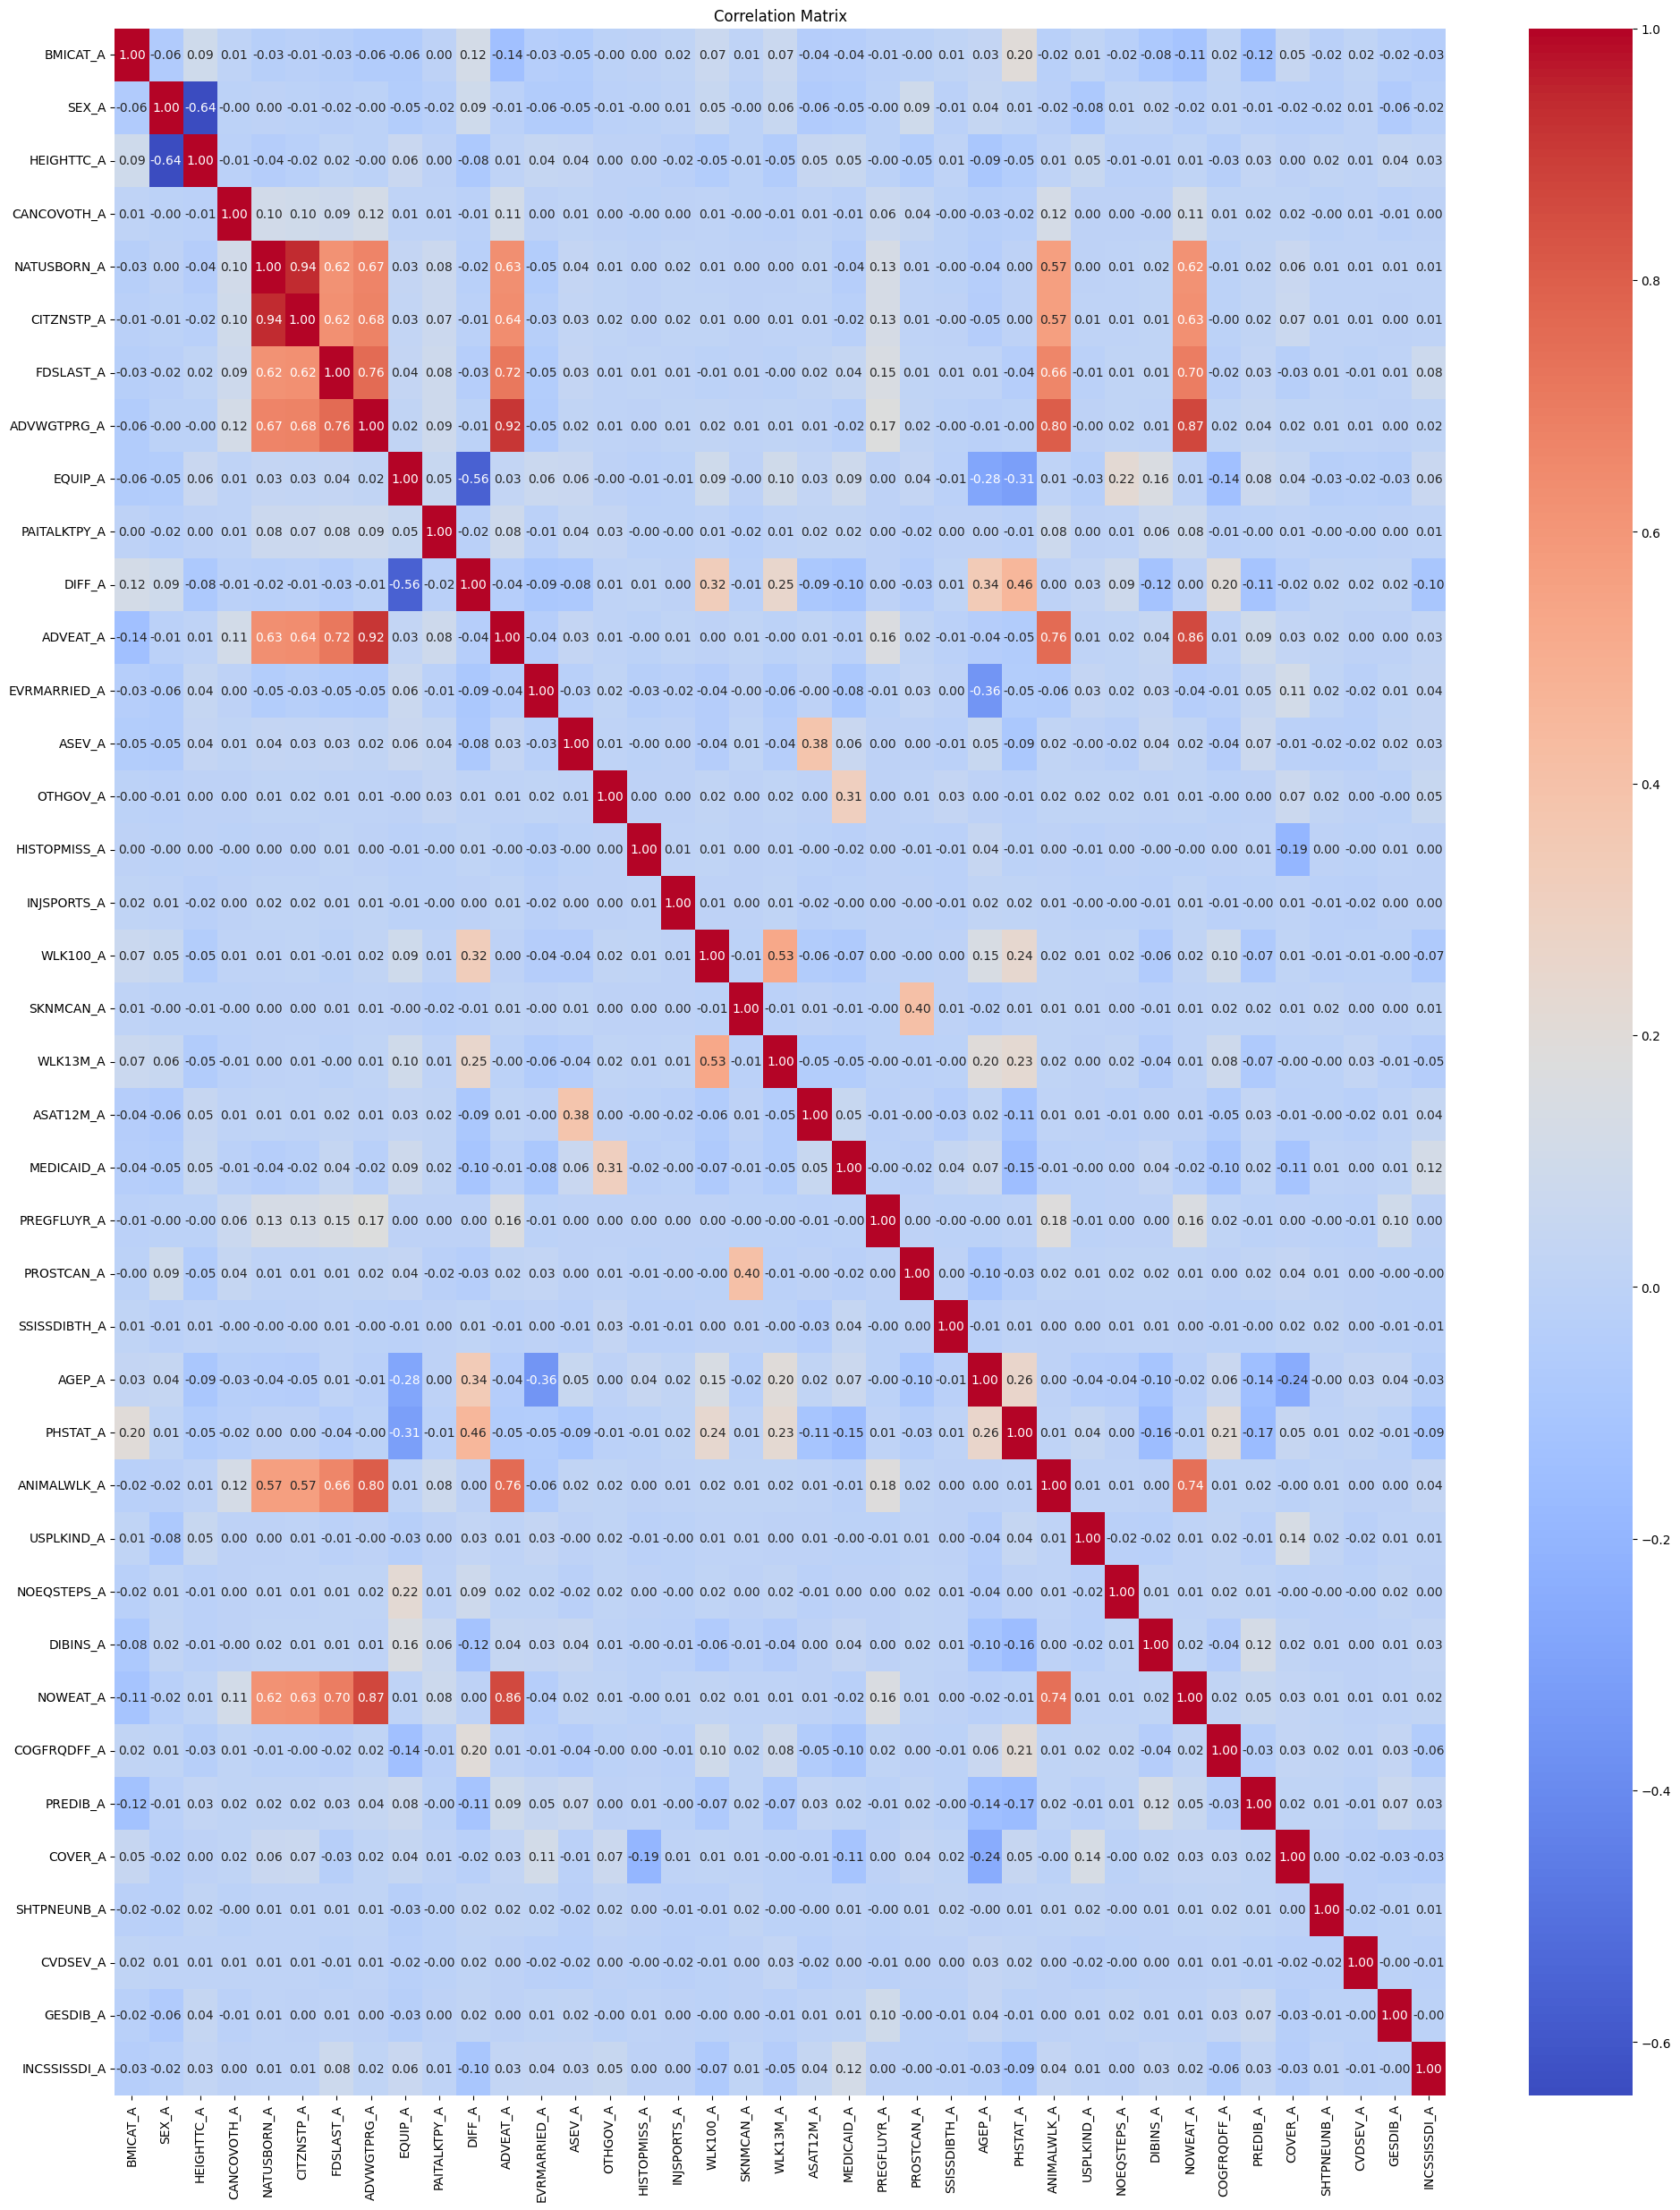

In [ ]:
# Assuming 'data' is your DataFrame
# Calculate the correlation matrix
correlation_matrix = features_xgb.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(24, 30))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
# Save the heatmap as a JPEG file
plt.savefig('correlation_heatmap.jpeg', format='jpeg')  # Uncomment for JPEG

plt.show()

#### XGBoost Features Selected Used for Model Development

In [ ]:
# XGBoost Model with reduced features
features_train_xgb, features_test_xgb, target_train_xgb, target_test_xgb = \
train_test_split(features_xgb, ys, test_size=0.3, random_state=42)

In [ ]:
#Random Forest Model with reduced features
features_train_rf, features_test_rf, target_train_rf, target_test_rf = \
train_test_split(features_rf, ys, test_size=0.3, random_state=42)

### Final Feature Selection Train-Test Split for Model Development

In [ ]:
# Decision tree Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import numpy as np

def performance_regression(y,p):
 error=y-p
 MSE=(error**2).mean()      #Mean Squared Error
 RMSE=np.sqrt(MSE)
 MAE=abs(error).mean()      #Mean Absolute Error, I like this
 print('RMSE= ',round(np.sqrt(MSE),2))
 print('MSE= ',round(MSE,2))
 print('MAE= ',round(MAE,2))
 p_empty=[y.mean()]*len(y)
 error_empty=y-p_empty
 Rsquared=1-(error**2).sum()/(error_empty**2).sum()
 print('R2= ',round(Rsquared,2))

# define model
#Decision Tree
model_dt=DecisionTreeRegressor(random_state=42)
model_dt.fit(features_train_rf, target_train_rf)
print('Test Set Performance Decision Trees')
performance_regression(target_test_rf,model_dt.predict(features_test_rf))
print('Training Set Performance Decision Trees')
performance_regression(target_train_rf,model_dt.predict(features_train_rf))

#Random Forest
model_rf=RandomForestRegressor(random_state=42)
model_rf.fit(features_train_rf, target_train_rf)
print('Test Set Performance Random Forest')
performance_regression(target_test_rf,model_rf.predict(features_test_rf))
print('Training Set Performance Random Forest')
performance_regression(target_train_rf,model_rf.predict(features_train_rf))

#Random Forest using XGBoost Features
model_rf=RandomForestRegressor(random_state=42)
model_rf.fit(features_train_xgb, target_train_xgb)
print('Test Set Performance Random Forest')
performance_regression(target_test_xgb,model_rf.predict(features_test_xgb))
print('Training Set Performance Random Forest')
performance_regression(target_train_xgb,model_rf.predict(features_train_xgb))


#XGBoost
model = XGBRegressor(random_state=42)
model.fit(features_train_xgb, target_train_xgb)
print('Test Set Performance XGBoost')
performance_regression(target_test_xgb,model.predict(features_test_xgb))
print('Training Set Performance XGBoost')
performance_regression(target_train_xgb,model.predict(features_train_xgb))

#XGBoost with Random Forest Features
model2 = XGBRegressor(random_state=42)
model2.fit(features_train_rf, target_train_rf)
print('Test Set Performance XGBoost with random forest feature selection')
performance_regression(target_test_rf,model2.predict(features_test_rf))
print('Training Set Performance XGBoost with random forest feature selection')
performance_regression(target_train_rf,model2.predict(features_train_rf))


Test Set Performance Decision Trees
RMSE=  20.81
MSE=  433.02
MAE=  14.88
R2=  0.72
Training Set Performance Decision Trees
RMSE=  0.0
MSE=  0.0
MAE=  0.0
R2=  1.0
Test Set Performance Random Forest
RMSE=  15.36
MSE=  235.9
MAE=  11.52
R2=  0.85
Training Set Performance Random Forest
RMSE=  5.73
MSE=  32.78
MAE=  4.26
R2=  0.98
Test Set Performance Random Forest
RMSE=  15.48
MSE=  239.62
MAE=  11.47
R2=  0.84
Training Set Performance Random Forest
RMSE=  5.79
MSE=  33.5
MAE=  4.29
R2=  0.98
Test Set Performance XGBoost
RMSE=  15.03
MSE=  225.79
MAE=  11.17
R2=  0.85
Training Set Performance XGBoost
RMSE=  11.67
MSE=  136.08
MAE=  8.83
R2=  0.91
Test Set Performance XGBoost with random forest feature selection
RMSE=  15.46
MSE=  239.12
MAE=  11.48
R2=  0.84
Training Set Performance XGBoost with random forest feature selection
RMSE=  10.25
MSE=  105.01
MAE=  7.74
R2=  0.93


In [ ]:
X=features_xgb #equate X to features selected from XGBoost
y=ys #target variable

X_train, X_test, y_train, y_target = \
train_test_split(X, y, test_size=0.3, random_state=42)

# Model Development

## Regression Models: Linear Regression, Ridge, Lasso

### Hyperparameters Tuning Notes

### Linear Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler



# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Linear Regression
print("\nLinear Regression")
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, lr_preds):.4f}")
print(f"R2 Score: {r2_score(y_test, lr_preds):.4f}")



Linear Regression
MSE: 467.6031
R2 Score: 0.6956


### Ridge

In [ ]:
#Ridge Regression with Hyperparameter Tuning
print("\nRidge Regression")
ridge = Ridge()
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_grid.fit(X_train, y_train)
print(f"Best alpha: {ridge_grid.best_params_['alpha']}")
ridge_preds = ridge_grid.best_estimator_.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, ridge_preds):.4f}")
print(f"R2 Score: {r2_score(y_test, ridge_preds):.4f}")


Ridge Regression
Best alpha: 10
MSE: 467.4151
R2 Score: 0.6958


### Lasso

In [ ]:
#Lasso Regression with Hyperparameter Tuning
print("\nLasso Regression")
lasso = Lasso()
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_grid.fit(X_train, y_train)
print(f"Best alpha: {lasso_grid.best_params_['alpha']}")
lasso_preds = lasso_grid.best_estimator_.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, lasso_preds):.4f}")
print(f"R2 Score: {r2_score(y_test, lasso_preds):.4f}")


Lasso Regression
Best alpha: 0.01
MSE: 467.3850
R2 Score: 0.6958


### Performance Metrics



## Tree-Based Models: Decision Trees, Random Forest, XGBoost

#### Random Forest Hyperparameter Tuning

In [ ]:
#GridSearch CV to find best parameters for Random Forest and XGBoost
from sklearn.model_selection import GridSearchCV

# Define the parameter grids for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30]
}
# Create a Random Forest regressor
rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf,
                           scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)

# Fit the GridSearchCV to the data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best score for Random Forest
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best Parameters for Random Forest:", best_params_rf)
#print("Best Score (MSE) for Random Forest:", best_score_rf)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters for Random Forest: {'max_depth': 10, 'n_estimators': 200}


In [ ]:
#Random Forest

model_rf=RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

model_rf.fit(X_train, y_train)
pred_rf=model_rf.predict(X_test)

print(f"MSE: {mean_squared_error(y_test, pred_rf):.4f}")

print('Test Set Performance Random Forest')
performance_regression(y_test,model_rf.predict(X_test))
print('Training Set Performance Random Forest')
performance_regression(y_train,model_rf.predict(X_train))


MSE: 217.3501
Test Set Performance Random Forest
RMSE=  14.74
MSE=  217.35
MAE=  10.98
R2=  0.86
Training Set Performance Random Forest
RMSE=  11.98
MSE=  143.43
MAE=  9.32
R2=  0.91


In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin
from xgboost import XGBRegressor

class SklearnCompatibleXGBRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, **kwargs):
        self.model = XGBRegressor(**kwargs)

    def fit(self, X, y, **kwargs):
        self.model.fit(X, y, **kwargs)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def get_params(self, deep=True):
        return self.model.get_params(deep)

    def set_params(self, **params):
        self.model.set_params(**params)
        return self

#### XGBoost Hyperparameter Tuning


In [ ]:
from sklearn.model_selection import GridSearchCV

# Initialize wrapped model (due to incompatibility problem with SkLearn and XGBoost)
xgb = SklearnCompatibleXGBRegressor()

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}


# Perform Grid Search
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [ ]:
#XGBoost

model_xgb=XGBRegressor(max_depth=5, n_estimators=100,learning_rate=0.1, random_state=42)
model_xgb.fit(X_train, y_train)
print('Test Set Performance XGBoost')
performance_regression(y_test,model_xgb.predict(X_test))
print('Training Set Performance XGBoost')
performance_regression(y_train,model_xgb.predict(X_train))

Test Set Performance XGBoost
RMSE=  14.55
MSE=  211.76
MAE=  10.88
R2=  0.86
Training Set Performance XGBoost
RMSE=  13.2
MSE=  174.11
MAE=  10.11
R2=  0.89


## Exporting Machine Learning Model


In [ ]:
import pickle

def save_model_info(student_names, student_ids, model, output_file):
    """
    Save model information to a file.

    Args:
        student_names (list): List of student names.
        student_ids (list): List of student IDs.
        model: Trained model.
        output_file (str): Output file name.
    """
    data = {
        'student_names': student_names,
        'student_ids': student_ids,
        'model': model

    }
    with open(output_file, 'wb') as f:
        pickle.dump(data, f)

In [ ]:
student_names = ['Thandiwe Moyo', "Akéssi N'guessan", 'Vikash Pradhan','Gregoire Mazal','Valentin Dupuy']
student_ids = ['102309', '87378', '87415','65222','87366']
model = model_xgb #your trained model
output_file = 'Moyo_Nguessan_Pradhan_Mazal_Dupuy_model_info.pkl'
save_model_info(student_names, student_ids, model, output_file)

from google.colab import files

# Download the pickle file
files.download('Moyo_Nguessan_Pradhan_Mazal_Dupuy_model_info.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Just to verify the elements in the pickle file

with open(output_file, 'rb') as f:
    saved_data = pickle.load(f)

print("Student Names:", saved_data['student_names'])
print("Student IDs:", saved_data['student_ids'])
print("Model Coefficients:", saved_data['model'].feature_names_in_)

Student Names: ['Thandiwe Moyo', "Akéssi N'guessan", 'Vikash Pradhan', 'Gregoire Mazal', 'Valentin Dupuy']
Student IDs: ['102309', '87378', '87415', '65222', '87366']
Model Coefficients: ['BMICAT_A' 'SEX_A' 'HEIGHTTC_A' 'CANCOVOTH_A' 'NATUSBORN_A' 'CITZNSTP_A'
 'FDSLAST_A' 'ADVWGTPRG_A' 'EQUIP_A' 'PAITALKTPY_A' 'DIFF_A' 'ADVEAT_A'
 'EVRMARRIED_A' 'ASEV_A' 'OTHGOV_A' 'HISTOPMISS_A' 'INJSPORTS_A'
 'WLK100_A' 'SKNMCAN_A' 'WLK13M_A' 'ASAT12M_A' 'MEDICAID_A' 'PREGFLUYR_A'
 'PROSTCAN_A' 'SSISSDIBTH_A' 'AGEP_A' 'PHSTAT_A' 'ANIMALWLK_A'
 'USPLKIND_A' 'NOEQSTEPS_A' 'DIBINS_A' 'NOWEAT_A' 'COGFRQDFF_A' 'PREDIB_A'
 'COVER_A' 'SHTPNEUNB_A' 'CVDSEV_A' 'GESDIB_A' 'INCSSISSDI_A']
